## Завдання.
Завантажте зображення titanic.jpg, що знаходиться в репозиторії лекції. Застосуйте до нього
методи детекції облич Віоли-Джонса та HOG.
Оформіть результати детекції в середовищі Jupyter Notebook.


In [1]:
import cv2
import dlib
from time import time
import matplotlib.pyplot as plt
from scipy import ndimage

### Viola-Jones Face Detection Algorithm

In [2]:
faceCascade = cv2.CascadeClassifier('Lesson_65_PDS3.xml')

In [3]:
image = cv2.imread('titanic.jpg')

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 5)

<function matplotlib.pyplot.show(close=None, block=None)>

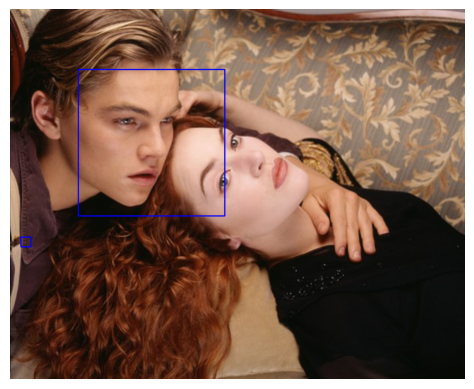

In [5]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show

In [6]:
image = cv2.imread('titanic.jpg')
rotated_270 = ndimage.rotate(image, 270)

In [7]:
gray = cv2.cvtColor(rotated_270, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(rotated_270, (x, y), (x+w, y+h), (255, 0, 0), 5)

<function matplotlib.pyplot.show(close=None, block=None)>

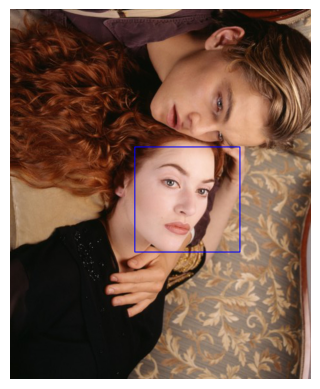

In [8]:
plt.imshow(cv2.cvtColor(rotated_270, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show

### HOG  Face Detection Algorithm

In [9]:
hog_face_detector = dlib.get_frontal_face_detector()
hog_face_detector

In [10]:
def hogDetectFaces(image, hog_face_detector, display = True):

    height, width, _ = image.shape

    output_image = image.copy()

    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    start = time()

    results = hog_face_detector(imgRGB, 0)

    end = time()

    for bbox in results:

        x1 = bbox.left()
        y1 = bbox.top()
        x2 = bbox.right()
        y2 = bbox.bottom()

        cv2.rectangle(output_image, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=width//200)  

    if display:

        cv2.putText(output_image, text='Time taken: '+str(round(end - start, 2))+' Seconds.', org=(10, 65),
                    fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=width//700, color=(0,0,255), thickness=width//500)

        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');

    else:

        return output_image, results

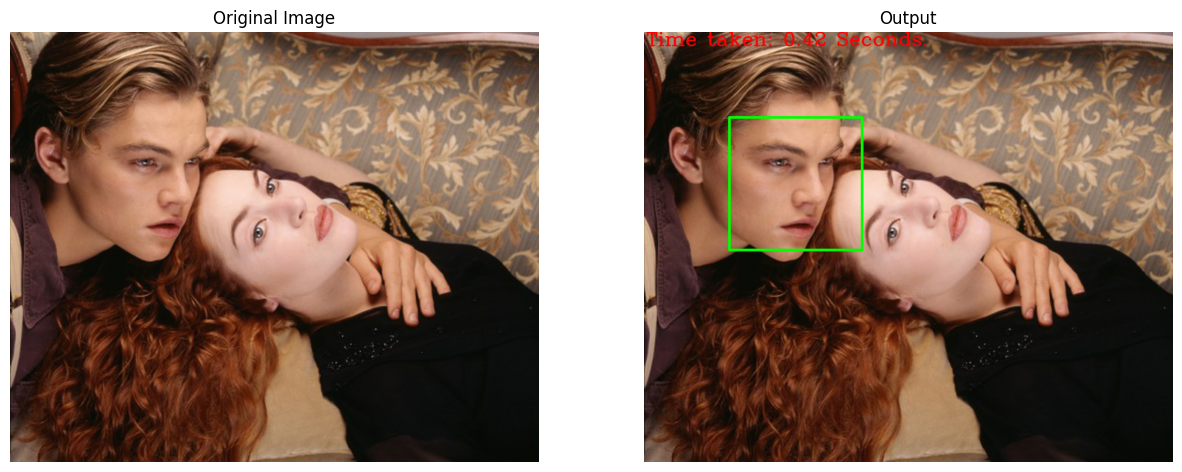

In [11]:
image = cv2.imread('titanic.jpg')
hogDetectFaces(image, hog_face_detector, display=True)

In [12]:
rotated_90 = cv2.rotate(image, rotateCode = cv2.ROTATE_90_CLOCKWISE)

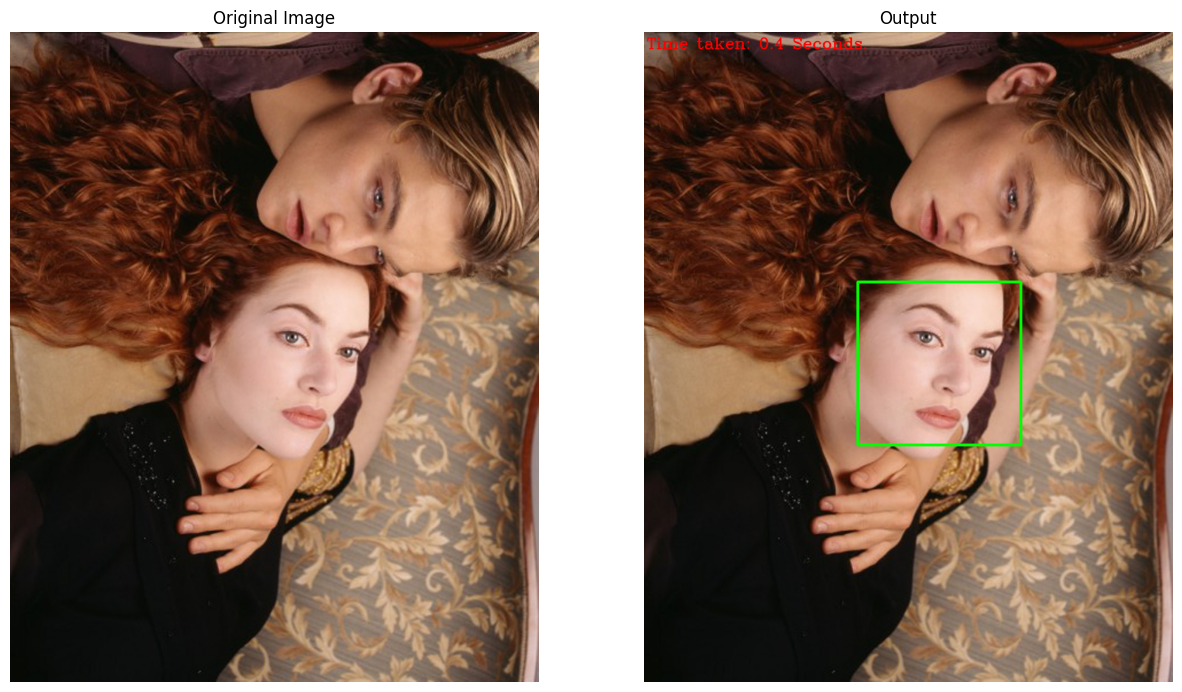

In [13]:
hogDetectFaces(rotated_90, hog_face_detector, display=True)

In [14]:
rotated_330 = ndimage.rotate(image, 330)

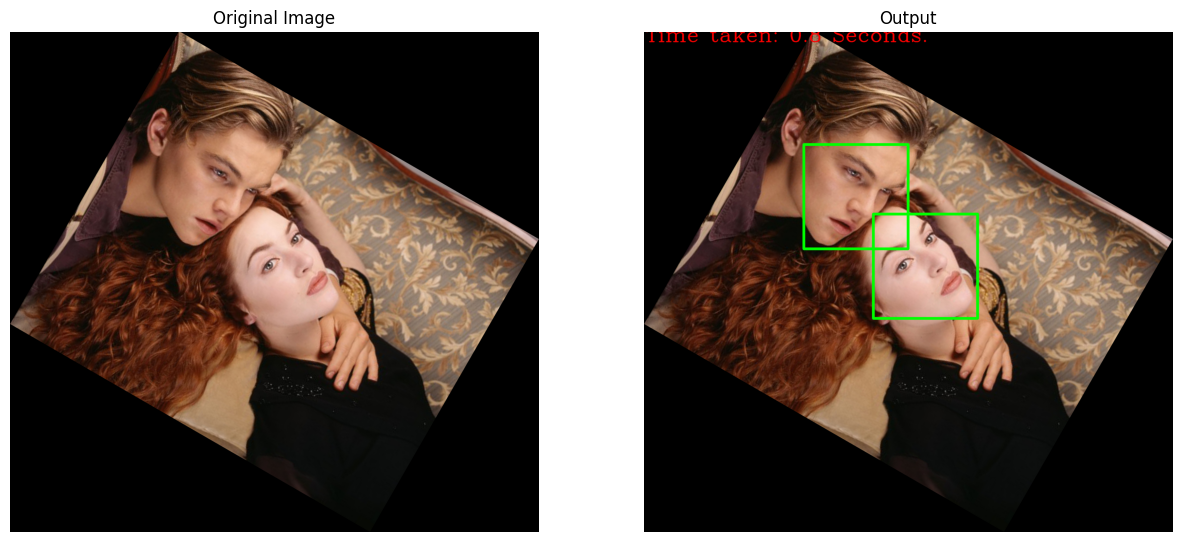

In [15]:
hogDetectFaces(rotated_330, hog_face_detector, display=True)